<a href="https://colab.research.google.com/github/AhmedAnasHaouari/project_2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # **PROJECT 2 (Part 1)** :

- Haouari Ahmed Anas

- 20/12/2023

# Imports :

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config, preprocessing
set_config(transform_output='pandas')

 - Sources :
  - Dataset: wenruliu. (2016). Adult income dataset. Retrieved from https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

  
  

- Brief description of data :

  - An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc. The detailed description on the dataset can be found in the original UCI documentation
  http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html



- Targets :

  -  Income.


- Rows :

  - 48842 persons.



- Type of problem :

  - Classification.

- Features :

  - 15 features.

# Loading Data :

In [131]:
file = "/content/drive/MyDrive/datasets/adult.csv"
df = pd.read_csv(file)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [132]:
df1 = df.copy()

In [133]:
df.shape

(48842, 15)

- Cleaning data :

In [134]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [135]:
df.duplicated().sum()

52

In [136]:
df.drop_duplicates(inplace = True)

- Exploring data :

In [137]:
df.describe().round(2)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.00,48790.00,48790.00,48790.00,48790.00,48790.00
mean,38.65,189669.00,10.08,1080.22,87.60,40.43
std,13.71,105617.23,2.57,7455.91,403.21,12.39
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117555.00,9.00,0.00,0.00,40.00
50%,37.00,178138.50,10.00,0.00,0.00,40.00
75%,48.00,237606.25,12.00,0.00,0.00,45.00
max,90.00,1490400.00,16.00,99999.00,4356.00,99.00


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [139]:
df.isin(['?']).sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [140]:
df.isin([0]).sum()

age                    0
workclass              0
fnlwgt                 0
education              0
educational-num        0
marital-status         0
occupation             0
relationship           0
race                   0
gender                 0
capital-gain       44755
capital-loss       46508
hours-per-week         0
native-country         0
income                 0
dtype: int64

In [141]:
df['workclass']=df['workclass'].replace('?',np.nan)
df['occupation']=df['occupation'].replace('?',np.nan)

In [142]:
for column in df.columns :
  if df[column].dtypes == 'object' :
    n = df[column].nunique()
    print(f'{df[column].value_counts()}\n')
    if n > 9 :
      print(f'There are {n} unique values for {column}. This is a feature with a high cardinality.\n')

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64

There are 16 unique values for education. This is a feature with a high cardinality.

Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64

Prof-specialty       6165
Craft-repair 

In [143]:
df['educational-num'].value_counts()

9     15770
10    10863
13     8013
14     2656
11     2060
7      1812
12     1601
6      1389
4       954
15      834
5       756
8       655
16      594
3       507
2       245
1        81
Name: educational-num, dtype: int64

- Value counts of the educational_num are the same then those of education. They represente the same variable and one of them can be dropped.

In [144]:
df.drop(columns = 'educational-num', inplace = True)

- Native-country is a feature with a high cardinality. It could be better to drop it.

In [145]:
df.drop(columns = 'native-country', inplace = True)

- Both capital-gain and capital-loss columns have almost 90% data as 0. We can drop them.   

In [146]:
df.drop(columns = ['capital-gain', 'capital-loss'], inplace = True)

In [147]:
df.shape

(48790, 11)

In [148]:
df.dropna(how='any',inplace=True)

# Data visualization :

In [149]:
encoder = preprocessing.LabelEncoder()

In [150]:
for i in df.columns :
  if df[i].dtypes == 'object' :
    df[i] = encoder.fit_transform(df[i])

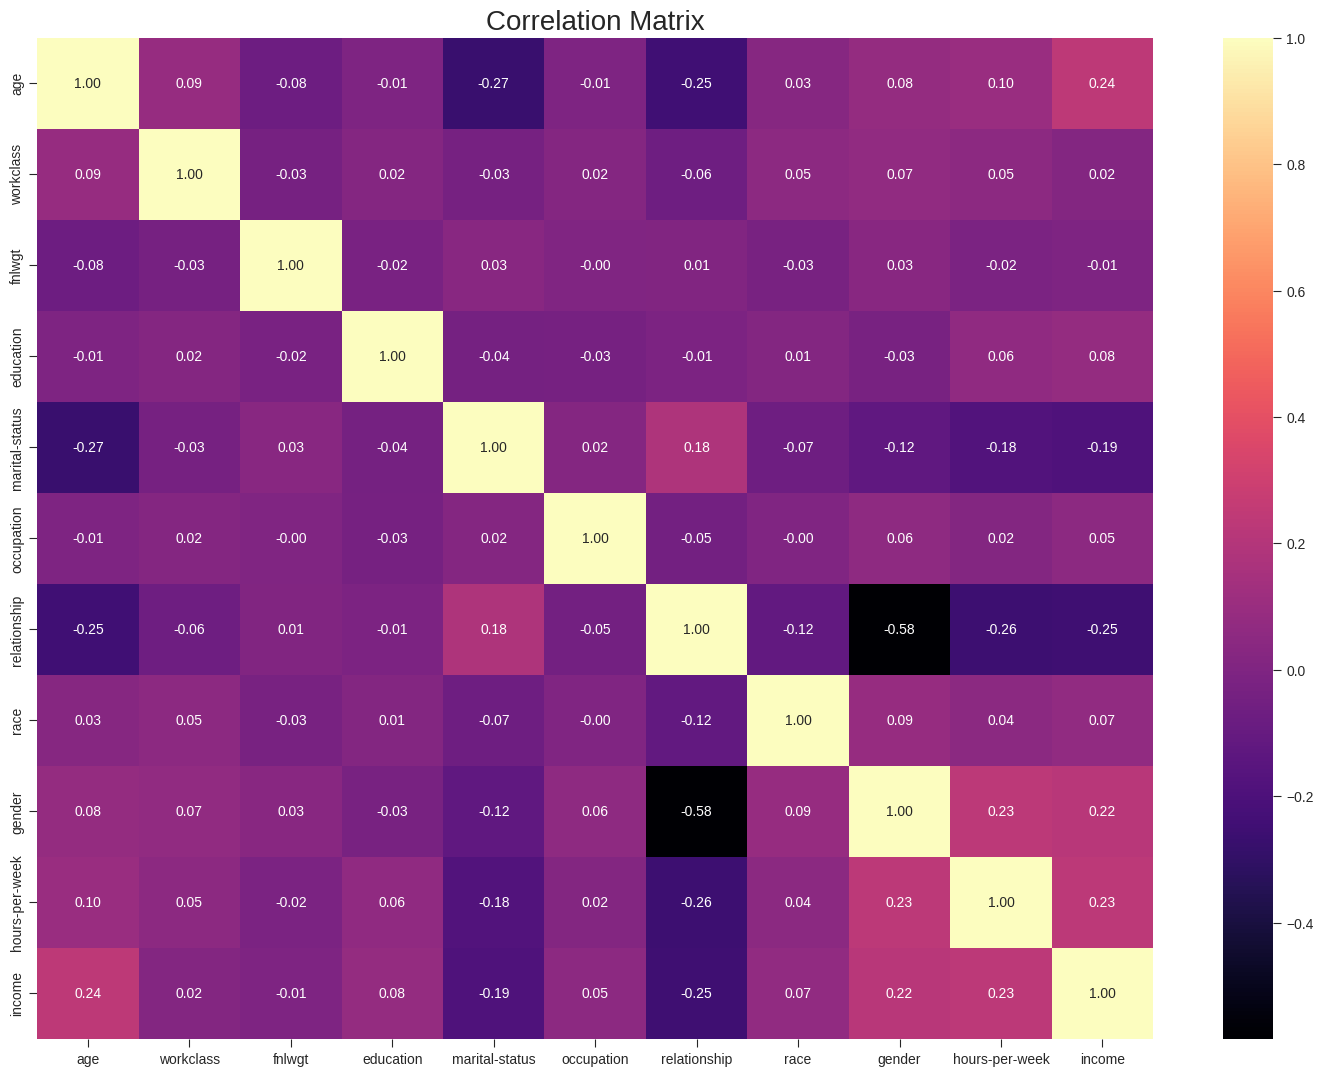

In [151]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

<Axes: xlabel='gender', ylabel='count'>

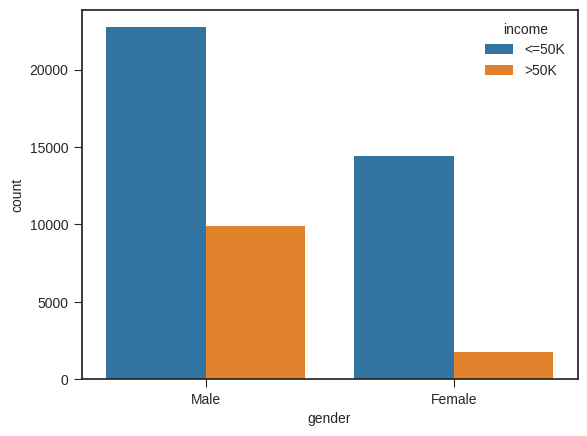

In [152]:
sns.countplot(data=df1, x='gender', hue='income')

- Men have a higher likelihood of earning an income greater than or equal to $50,000 compared to women

In [153]:
df1['hours-per-week_bin'] = pd.cut(df1['hours-per-week'], bins=10)

<ipython-input-158-8e765d93ca62>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


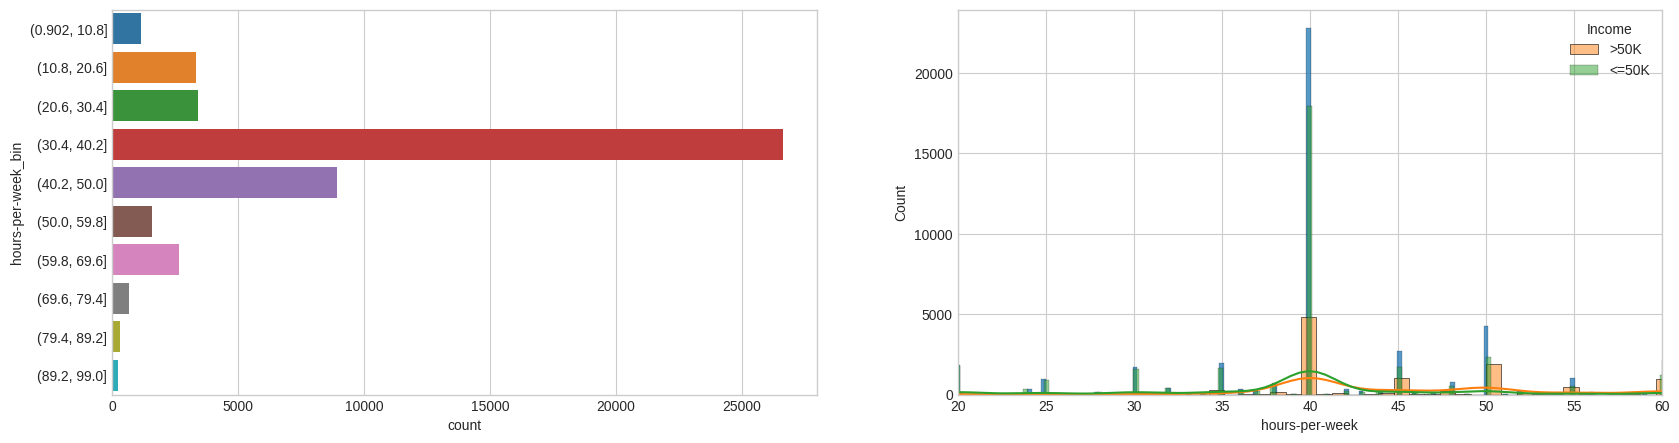

In [158]:
plt.style.use('seaborn-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(y="hours-per-week_bin", data=df1, ax=axes[0])

sns.histplot(df1['hours-per-week'], ax=axes[1])
sns.histplot(df1[df1['income'] == '>50K']['hours-per-week'], label='>50K', kde=True, ax=axes[1])
sns.histplot(df1[df1['income'] == '<=50K']['hours-per-week'], label='<=50K', kde=True, ax=axes[1])

axes[1].set_ylim(0, None)
axes[1].set_xlim(20, 60)

axes[1].legend(title='Income')

plt.show()

- A clear correlation exists between an individual's hours of work per week and their income category, with a highest income for those how work  between 30 and 40 hours a week.

In [155]:
df1['age_bin'] = pd.cut(df1['age'], 20)

<ipython-input-156-be0750822e2a>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


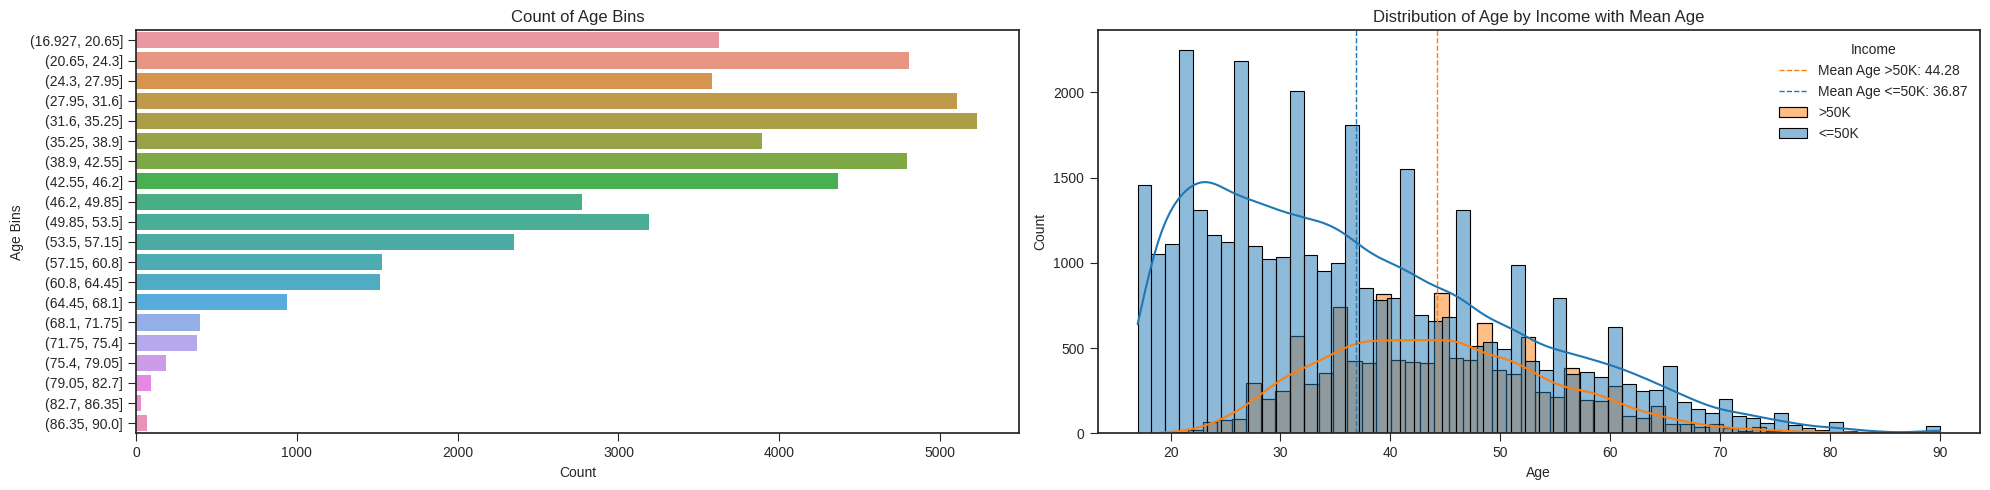

In [156]:
plt.style.use('seaborn-ticks')
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(y="age_bin", data=df1, ax=axes[0])
axes[0].set_title('Count of Age Bins')
axes[0].set_ylabel('Age Bins')
axes[0].set_xlabel('Count')

for income_category, color in zip(['>50K', '<=50K'], ['C1', 'C0']):
    sns.histplot(df1[df1['income'] == income_category]['age'], kde=True, label=income_category, color=color, ax=axes[1])
    mean_age = df1[df1['income'] == income_category]['age'].mean()
    axes[1].axvline(mean_age, color=color, linestyle='--', label=f'Mean Age {income_category}: {mean_age:.2f}', linewidth=1)

axes[1].set_title('Distribution of Age by Income with Mean Age')
axes[1].set_xlabel('Age')
axes[1].legend(title='Income')

plt.tight_layout()
plt.show()

- Certain age categories show a significant skew in income distribution, with some age groups having a highest representation in high income categorie.